In [1]:
#Installing Twitter Packages
install.packages("twitteR",repos = "http://cran.us.r-project.org")
library("twitteR")
require("twitteR")

package 'twitteR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\Rtmpg7A6TC\downloaded_packages


In [2]:
#Twitter Authentication
api_key <- "alEJkwQJQjs6SHXWbsTmQcUI9"
api_secret <- "Je1LkjkBhpzsB6GASw7xUHsfvSA9rCVz0is80HVMccDbnQsKV1"
access_token <- "139005952-gQJeEIEmw4e9jgnwb6D7KDjh7KuS9sjRkzUsruiN"
access_token_secret <- "vE8dEULqlRH2EM0hZZiFIzWQXoHEIiC9wF0arPdSXgAg7"
setup_twitter_oauth(api_key,api_secret,access_token,access_token_secret)

[1] "Using direct authentication"


In [4]:
#Tweet Collection in bathces. Only the first batch is used to plot the points on the map due to the google api limit of 2500 per day
superbowl_set1 <- searchTwitter('superbowl', n=7000, since='2017-02-14', until='2017-02-15', geocode='37.0902,-95.7129,1300mi', lang = 'en')

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
"7000 tweets were requested but the API can only return 4288"

In [5]:
superbowl_set2 <- searchTwitter('superbowl', n=7000, since='2017-02-12', until='2017-02-13', geocode='37.0902,-95.7129,1300mi', lang = 'en')

Warning message in doRppAPICall("search/tweets", n, params = params, retryOnRateLimit = retryOnRateLimit, :
"7000 tweets were requested but the API can only return 5538"

In [6]:
superbowl_set3 <- searchTwitter('superbowl', n=7000, since='2017-02-09', until='2017-02-11', geocode='37.0902,-95.7129,1300mi', lang = 'en')

In [7]:
superbowl_set4 <- searchTwitter('superbowl', n=7000, since='2017-02-04', until='2017-02-08', geocode='37.0902,-95.7129,1300mi', lang = 'en')

In [8]:
#Prepared the data frame of all the data collected
superbowl_set1.df <- twListToDF(superbowl_set1)
superbowl_set2.df <- twListToDF(superbowl_set2)
superbowl_set3.df <- twListToDF(superbowl_set3)
superbowl_set4.df <- twListToDF(superbowl_set4)

In [9]:
#Get Users for the first set
userSet1 <- lookupUsers(superbowl_set1.df$screenName)
userSet1.df <- twListToDF(userSet1)

In [3]:
#Store data in a database
library(RSQLite)
library(DBI)
register_sqlite_backend("C:/users/Admin/Documents/DIC/SQLite/Lab1.db")
db <- dbConnect(SQLite(),dbname="C:/users/Admin/Documents/DIC/SQLite/Lab1.db")

In [4]:
dbListTables(db) #check for the tables in the db

[1] "LatLongStateWise"      "Latlongtostate"        "Problem1Tweets"       
 [4] "Problem1Users"         "Set1Users"             "StateValues"          
 [7] "Stateplotfreq"         "SuperBowl1StateMap"    "SuperBowlLatLongS1"   
[10] "SuperBowlS1StateCount" "SuperBowlSet1"

In [12]:
dbWriteTable(db, "Problem1Tweets", superbowl_set1.df)

[1] TRUE

In [14]:
dbWriteTable(db, "'Set1Users'", userSet1.df)

[1] TRUE

In [11]:
dbGetQuery(db,"Select count(location) from 'Set1Users'") 

count(location)
3337


In [13]:
dbGetQuery(db,"Select location from Problem1Users where location != ''") 

location
the callous daoboys
mexico
Merda
<U+062A><U+063A><U+0631><U+064A><U+062F><U+0627><U+062A><U+064A> <U+0628><U+0627><U+0644><U+0645><U+0641><U+0636><U+0644><U+0647> <U+263B>
"San Antonio, TX"
"Boston, MA"
United Kingdom
"Tampa, Fl"
"Shadyside, OH"
East Coast USA


In [14]:
locations <- dbGetQuery(db,"Select location from Problem1Users where location != ''")

In [36]:
#Loaded the required packages for plotting the map
library("maptools")
library("maps")

Loading required package: ggplot2
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


In [43]:
latlongvalueSet1<-dbGetQuery(db,"Select * from SuperBowlLatLongS1")

In [ ]:
latlongvalueSet1 <- geocode(locations)
latlongvalueSet1.x <- latlongvalueSet1$lon
latlongvalueSet1.y <- latlongvalueSet1$lat

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=the%20callous%20daoboys&sensor=false
Warning message:
"geocode failed with status ZERO_RESULTS, location = "the callous daoboys""Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=mexico&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Merda&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=%D8%AA%D8%BA%D8%B1%D9%8A%D8%AF%D8%A7%D8%AA%D9%8A%20%D8%A8%D8%A7%D9%84%D9%85%D9%81%D8%B6%D9%84%D9%87%20%E2%98%BB%20&sensor=false
Warning message:
"geocode failed with status ZERO_RESULTS, location = "<U+062A><U+063A><U+0631><U+064A><U+062F><U+0627><U+062A><U+064A> <U+0628><U+0627><U+0644><U+0645><U+0641><U+0636><U+0644><U+0647> <U+263B> ""Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Antonio,%20TX&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/

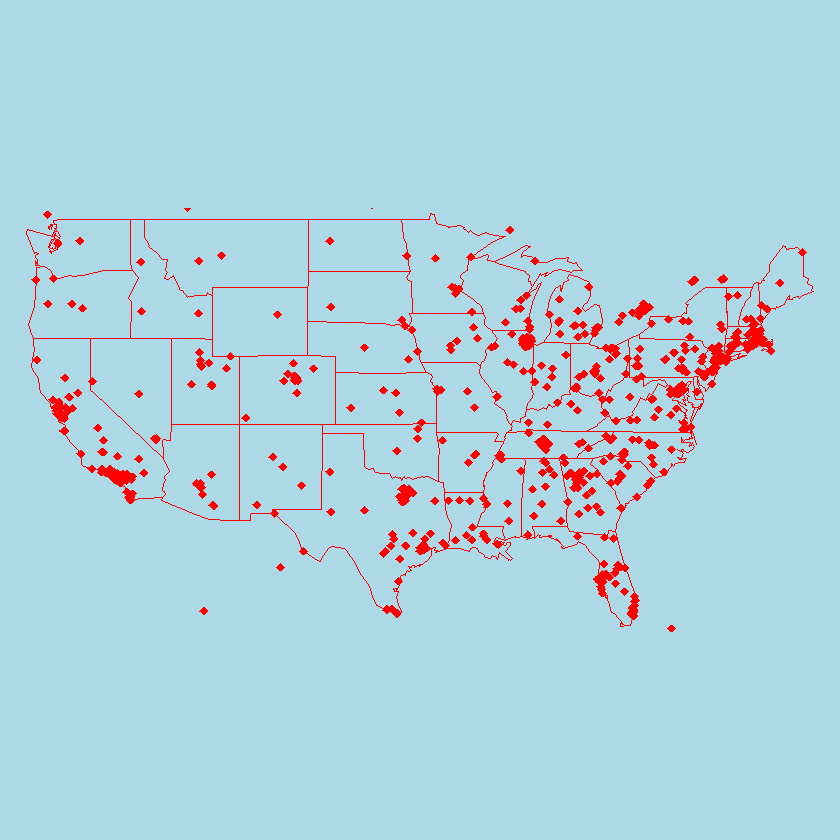

In [44]:
#Plot the tweets on the US map as per their latitude and longitude
library("ggmap")
map("state",col=rainbow(50), bg="lightblue", mar=c(0,0,0,0))
points(latlongvalueSet1.x,latlongvalueSet1.y, col="Red", pch=18)

In [27]:
#Remove all the lat long values from latlongvalueSet1 having values 'NA'
latlongvalueSet1NA <- na.omit(object = latlongvalueSet1)
dbWriteTable(db, "SuperBowlLatLongS1", latlongvalueSet1NA)
dbGetQuery(db,"Select * from SuperBowlLatLongS1")

lon,lat
-102.552784,23.63450
72.339993,23.20012
-98.493628,29.42412
-82.907123,40.41729
-71.058880,42.36008
-3.435973,55.37805
-82.457178,27.95058
-80.750640,39.97091
-73.674232,40.74226
-97.743061,30.26715


In [49]:
dbGetQuery(db,"Select count(*) from SuperBowlLatLongS1")

count(*)
2069


In [37]:
#function to filter the locations within the US and get the corresponding states
#Source - http://stackoverflow.com/questions/28421353/how-to-add-hawaii-and-alaska-to-spatial-polygons-in-r
latlong2state <- function(latlongvalueSet1NA) {
  states <- map('state', fill=TRUE, col="transparent", plot=FALSE)
  IDs <- sapply(strsplit(states$names, ":"), function(x) x[1])
  states_sp <- map2SpatialPolygons(states, IDs=IDs,
                                   proj4string=CRS("+proj=longlat +datum=wgs84"))
  pointsSP <- SpatialPoints(latlongvalueSet1NA, 
                            proj4string=CRS("+proj=longlat +datum=wgs84"))
  indices <- over(pointsSP, states_sp)
  stateNames <- sapply(states_sp@polygons, function(x) x@ID)
  stateNames[indices]
}

In [38]:
latlong2stateNA <- latlong2state(latlongvalueSet1NA)

In [50]:
latlong2stateNA

[1] NA                     NA                     "texas"               
   [4] "ohio"                 "massachusetts"        NA                    
   [7] NA                     "west virginia"        "new york"            
  [10] "texas"                NA                     NA                    
  [13] "kansas"               "texas"                "nevada"              
  [16] NA                     NA                     "massachusetts"       
  [19] "connecticut"          "michigan"             "illinois"            
  [22] "north carolina"       "nevada"               "texas"               
  [25] "california"           "district of columbia" "california"          
  [28] "kansas"               NA                     "texas"               
  [31] "new york"             "massachusetts"        NA                    
  [34] NA                     NA                     NA                    
  [37] NA                     NA                     "minnesota"           
  [40] "texas"                NA                     "pennsylvania"        
  [43] "georgia"              "virginia"             "texas"               
  [46] "kansas"               "new mexico"           NA                    
  [49] NA                     "california"           "california"          
  [52] "south carolina"       NA                     "massachusetts"       
  [55] "illinois"             NA                     "tennessee"           
  [58] "texas"                NA                     NA                    
  [61] "florida"              "georgia"              "georgia"             
  [64] "alabama"              "california"           "california"          
  [67] NA                     NA                     "kansas"              
  [70] "illinois"             "california"           "georgia"             
  [73] "california"           "montana"              "illinois"            
  [76] "texas"                "kentucky"             NA                    
  [79] "utah"                 NA                     "texas"               
  [82] "texas"                "california"           "georgia"             
  [85] NA                     "illinois"             "illinois"            
  [88] "massachusetts"        "virginia"             NA                    
  [91] NA                     NA                     "north carolina"      
  [94] NA                     "illinois"             "louisiana"           
  [97] "kansas"               "georgia"              NA                    
 [100] "california"           NA                     NA                    
 [103] NA                     "massachusetts"        "illinois"            
 [106] "massachusetts"        NA                     NA                    
 [109] "minnesota"            "california"           "california"          
 [112] "kansas"               "california"           "new york"            
 [115] "kansas"               "new jersey"           "pennsylvania"        
 [118] "new jersey"           NA                     "georgia"             
 [121] "new york"             "minnesota"            "georgia"             
 [124] "kansas"               "texas"                NA                    
 [127] "tennessee"            NA                     "north dakota"        
 [130] "california"           "kansas"               NA                    
 [133] NA                     "massachusetts"        NA                    
 [136] NA                     "new york"             "illinois"            
 [139] "minnesota"            "california"           NA                    
 [142] "california"           "illinois"             "virginia"            
 [145] "louisiana"            "missouri"             "colorado"            
 [148] "georgia"              "pennsylvania"         "louisiana"           
 [151] "south carolina"       "georgia"              NA                    
 [154] "colorado"             "california"           "alabama"             
 [157] "texas"                "pennsylvania"       

In [1]:
#Stored the data in a table in the Db
dbWriteTable(db, "SuperBowl1StateMap", as.data.frame(latlong2stateNA))

ERROR: Error in eval(expr, envir, enclos): could not find function "dbWriteTable"


In [11]:
#Grouped all the tweets based on their state and obtain the count from each state
temp<-dbGetQuery(db,"Select latlong2stateNA, count(*) as Freq from SuperBowl1StateMap group by latlong2stateNA")

In [13]:
temp

latlong2stateNA,Freq
alabama,18
arizona,21
arkansas,5
california,211
colorado,24
connecticut,18
delaware,1
district of columbia,38
florida,67
georgia,116


In [5]:
dbWriteTable(db, "SuperBowlS1StateCount", temp)
input <- dbGetQuery(db,"Select * from SuperBowlS1StateCount")
input$region <- input$latlong2stateNA

In [6]:
#Grouping all the lat longs in a state and plotting them together
install.packages("geom_polygon",repos = "http://cran.us.r-project.org")
library(plotly)
library(plyr)
library(mapproj)

Warning message:
"package 'geom_polygon' is not available (for R version 3.3.2)"Loading required package: ggplot2

Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout


Attaching package: 'plyr'

The following objects are masked from 'package:plotly':

    arrange, mutate, rename, summarise

The following object is masked from 'package:twitteR':

    id

Loading required package: maps

Attaching package: 'maps'

The following object is masked from 'package:plyr':

    ozone



In [7]:
us_state_map<- map_data('state') #Obtain Us state map
map_data <- merge(input, us_state_map, by = 'region') #merge all the input data with the states
map_data <- arrange(map_data, order)
states <- data.frame(state.center, state.abb)

In [8]:
#Source - R-bloggers
output <- ggplot(data = map_data, aes(x = long, y = lat, group = group)) + 
  geom_polygon(aes(fill = cut_number(Freq, 5))) + geom_path(colour = 'gray') + 
  scale_fill_brewer('US Tweet Distribution on Superbowl', palette  = 'Reds') + coord_map() + theme_bw()
output <- ggplotly(output)

In [10]:
#Ouput plot
embed_notebook(output)